In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Data Load
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

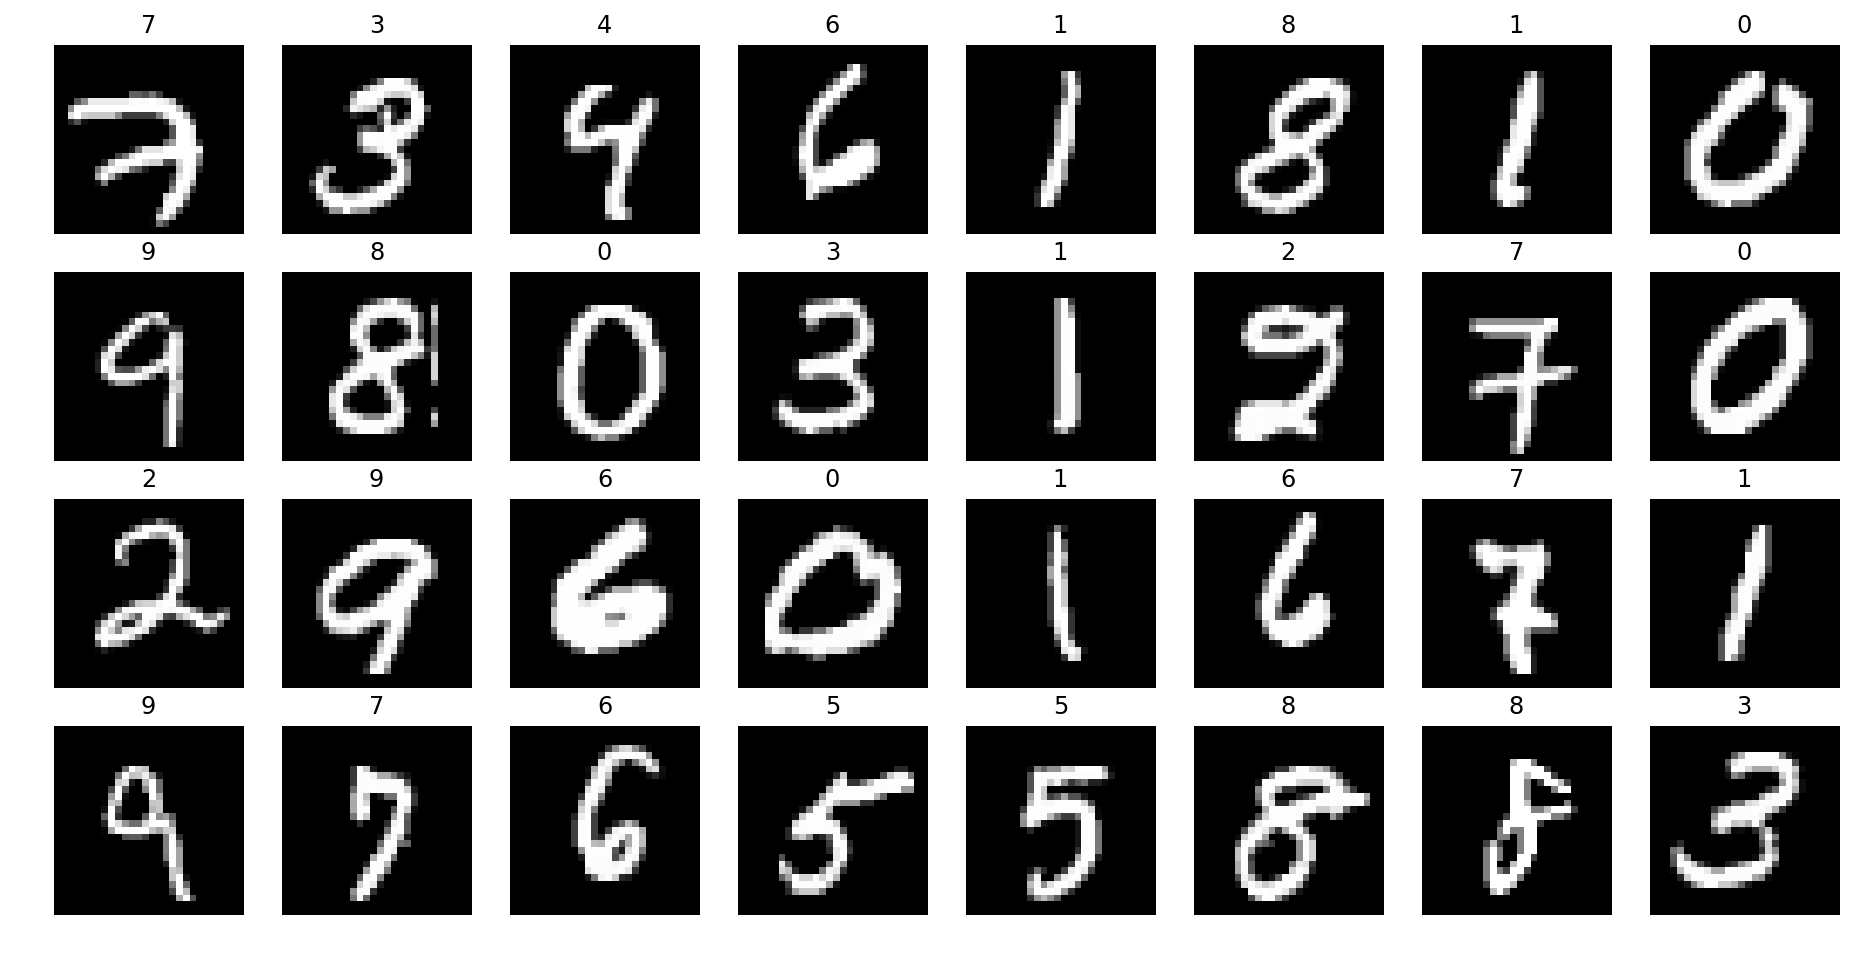

In [3]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

In [4]:
print("Min : {0}, Max : {1}".format(mnist.train.images[0].min(), mnist.train.images[0].max()))

Min : 0.0, Max : 0.9960784912109375


## Multi-label Classification
$$
\min_{W,b} \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})
$$
where $\hat{y_i^k} = softmax(x_i W + b)_k$

1. Forward Model : $\hat{y_i^k} = softmax(x_i W + b)_k$
1. Cross-Entropy : $\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})$



### 01. Model에 맞는 feature 정리
For $i=1,2,\cdots,m$,
$$
\texttt{features}_i = [\texttt{pixel}^i_1, \texttt{pixel}^i_2,\cdots, \texttt{pixel}^i_{784}]
$$

In [5]:
print(mnist.train.images.shape)
features = mnist.train.images
labels = mnist.train.labels

(55000, 784)


### 02. Model TensorFlow로 정의하기

- TODO1 : `features`를 `feed`할 placeholder(`x`)를 정의
- TODO2 : Weight(`W`)와 bias(`b`)를 `Variable`로 초기값 0으로 정의
- TODO3 & TODO4: Model(`model`) 정의
- `num_hidden` : 20
$$
\hat{y_i^k} = softmax((\sigma(xW_1+b_1)) W_2 + b_2)_k
$$

In [6]:
# TODO1
x = tf.placeholder(tf.float32, [None, 784])

# TODO2
num_hidden = 20
# W_hidden = tf.Variable(tf.zeros([784, num_hidden]))
# b_hidden = tf.Variable(tf.zeros([num_hidden]))

# W_out = tf.Variable(tf.zeros([num_hidden, 10]))
# b_out = tf.Variable(tf.zeros([10]))

# W_hidden = tf.Variable(tf.ones([784, num_hidden]))
# b_hidden = tf.Variable(tf.ones([num_hidden]))

# W_out = tf.Variable(tf.ones([num_hidden, 10]))
# b_out = tf.Variable(tf.ones([10]))

W_hidden = tf.Variable(tf.random_normal([784, num_hidden]))
b_hidden = tf.Variable(tf.random_normal([num_hidden]))

W_out = tf.Variable(tf.random_normal([num_hidden, 10]))
b_out = tf.Variable(tf.random_normal([10]))

# W_hidden = tf.Variable(tf.random_uniform([784, num_hidden], minval=-1, maxval=1))
# b_hidden = tf.Variable(tf.random_uniform([num_hidden], minval=-1, maxval=1))

# W_out = tf.Variable(tf.random_uniform([num_hidden, 10], minval=-1, maxval=1))
# b_out = tf.Variable(tf.random_uniform([10], minval=-1, maxval=1))

# W_hidden = tf.Variable(tf.random_uniform([784, num_hidden], minval=0, maxval=1))
# b_hidden = tf.Variable(tf.random_uniform([num_hidden], minval=0, maxval=1))

# W_out = tf.Variable(tf.random_uniform([num_hidden, 10], minval=0, maxval=1))
# b_out = tf.Variable(tf.random_uniform([10], minval=0, maxval=1))

# TODO3
hidden = tf.nn.sigmoid(tf.matmul(x, W_hidden) + b_hidden)
# TODO4
model = tf.nn.softmax(tf.matmul(hidden, W_out) + b_out)

print(x.shape)
print(W_hidden.shape)
print(b_hidden.shape)
print(W_out.shape)
print(b_out.shape)
print(model)

(?, 784)
(784, 20)
(20,)
(20, 10)
(10,)
Tensor("Softmax:0", shape=(?, 10), dtype=float32)


### 03. Cross-Entropy 정의하기

$$
\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})
$$

In [7]:
y = tf.placeholder(tf.float32, [None, 10])

loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model),1))

print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [8]:
# For testing accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 06. Stochastic Gradient Descent에 사용할 Hyper-Parameter 설정
1. Optimizer : `AdamOptimizer`
1. `batch_size` : `128`
1. `lerning rate` : `0.01`
1. `MaxEpoch` : `21`
1. Train Step

In [9]:
batch_size = 128
lr = 0.01
MaxEpochs = 21
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

### 07. Stochastic Gradient Descent(SGD)
- `mnist.train.next_batch()`사용하여 batch 생성하기
- batch만 사용하여, train 하기

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 200 == 0:
            curr_loss = sess.run(loss, feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 4.633254 0.0554
0 200 0.5728441 0.8431
0 400 0.40307623 0.8844

1 0 0.39409277 0.8866
1 200 0.32739016 0.9046
1 400 0.29405203 0.9133

2 0 0.29330352 0.91
2 200 0.26646915 0.921
2 400 0.24366654 0.9273

3 0 0.2436027 0.9277
3 200 0.22113766 0.9305
3 400 0.21271834 0.9321

4 0 0.21002011 0.9339
4 200 0.19563803 0.9337
4 400 0.19423082 0.9338

5 0 0.19541045 0.9309
5 200 0.18913639 0.9339
5 400 0.17438973 0.9413

6 0 0.17371 0.9379
6 200 0.17652602 0.9391
6 400 0.1708836 0.9382

7 0 0.1652404 0.9428
7 200 0.15947792 0.9408
7 400 0.15383373 0.9443

8 0 0.15444055 0.9419
8 200 0.1484964 0.9409
8 400 0.14581066 0.9457

9 0 0.14546555 0.9445
9 200 0.14307845 0.944
9 400 0.14078876 0.9453

10 0 0.14142945 0.9439
10 200 0.13252595 0.947
10 400 0.140804 0.9446

11 0 0.13703117 0.9446
11 200 0.12994371 0.9462
11 400 0.13118453 0.9447

12 0 0.1247883 0.9472
12 200 0.12594031 0.9488
12 400 0.12821586 0.9438

13 0 0.12754352 0.9437
13 200 0.12737457 0.9472
13 400 0.12232738 0.9452

14 0 0.11553

## Prediction

In [11]:
test_id = 9229
test_image = mnist.test.images[test_id]
test_label = mnist.test.labels[test_id]

out = sess.run(model, feed_dict={x:[test_image]})
print("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))

Predicted Label : 3 (Real Label : 3)


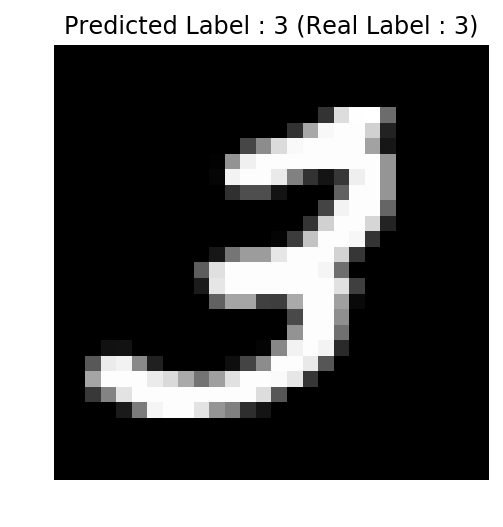

In [12]:
img = test_image.reshape(28,28)
label = np.argmax(test_label)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))
plt.show()

## MSE
이번엔 아래와 같은 loss function을 사용하여, SGD를 구현해보세요.

$$
E = \frac{1}{m}\sum_{i=1}^m \sum_{k=1}^{10} |\hat{y_i^k}-y_i^k|^2
$$

In [13]:
features = mnist.train.images
labels = mnist.train.labels

x = tf.placeholder(tf.float32, [None, 784])
num_hidden = 20
W_hidden = tf.Variable(tf.random_normal([784, num_hidden]))
b_hidden = tf.Variable(tf.random_normal([num_hidden]))

W_out = tf.Variable(tf.random_normal([num_hidden, 10]))
b_out = tf.Variable(tf.random_normal([10]))

hidden = tf.nn.sigmoid(tf.matmul(x, W_hidden) + b_hidden)
model = tf.nn.softmax(tf.matmul(hidden, W_out) + b_out)

y = tf.placeholder(tf.float32, [None, 10])

loss = tf.reduce_mean(tf.reduce_sum(tf.square(model - y),1))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

lr = 0.01
batch_size = 128
MaxEpochs = 21
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    # TODO 10
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # TODO 11
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 200 == 0:
            curr_loss = sess.run(loss, feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 1.2109435 0.0978
0 200 0.2383672 0.8387
0 400 0.16795385 0.8877

1 0 0.15795945 0.8946
1 200 0.13637865 0.9081
1 400 0.12291052 0.9193

2 0 0.12160174 0.9168
2 200 0.11239931 0.9193
2 400 0.107049875 0.9222

3 0 0.10890591 0.9215
3 200 0.09986393 0.9267
3 400 0.09525561 0.9296

4 0 0.09456009 0.9283
4 200 0.09144806 0.9324
4 400 0.0889511 0.9307

5 0 0.08717408 0.9335
5 200 0.087207615 0.9318
5 400 0.08342401 0.9334

6 0 0.08105376 0.9335
6 200 0.07976042 0.9369
6 400 0.0794166 0.9366

7 0 0.07877502 0.9349
7 200 0.077026084 0.9369
7 400 0.07465229 0.9364

8 0 0.07477777 0.9384
8 200 0.074536934 0.9364
8 400 0.0711542 0.9379

9 0 0.07031602 0.9367
9 200 0.072140306 0.936
9 400 0.070979156 0.9392

10 0 0.069483876 0.9409
10 200 0.0677141 0.9403
10 400 0.066907 0.9385

11 0 0.0666378 0.9389
11 200 0.06648459 0.9415
11 400 0.065271325 0.9406

12 0 0.061725006 0.9418
12 200 0.064883985 0.9395
12 400 0.06366792 0.9415

13 0 0.059355095 0.9407
13 200 0.060846716 0.9415
13 400 0.062090732